In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cr = pd.read_csv("CreditRisk.csv")

In [3]:
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
cr.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
cr.Gender = cr.Gender.fillna('Male')
cr.Married = cr.Married.fillna("Yes")
cr.Dependents = cr.Dependents.fillna(0)
cr.Self_Employed = cr.Self_Employed.fillna('No')
cr.LoanAmount = cr.LoanAmount.fillna(120)
cr.Loan_Amount_Term = cr.Loan_Amount_Term.fillna(360)
cr.Credit_History = cr.Credit_History.fillna(1)

In [6]:
cr.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
cr.Gender.replace({"Male": 1, "Female": 0}, inplace = True)
cr.Married.replace({"No": 0, "Yes": 1}, inplace = True)
cr.Education.replace({"Graduate" : 1, "Not Graduate": 0}, inplace = True)
cr.Self_Employed.replace({"No": 0, "Yes": 1}, inplace = True)
cr.Property_Area.replace({"Semiurban": 1, "Urban": 2, "Rural": 3}, inplace = True)
cr.Loan_Status.replace({"Y": 1, "N": 0}, inplace = True)

In [8]:
cr = cr.drop('Loan_ID', axis = 1)

In [9]:
cr.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,1,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,3,0
2,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,2,1


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
cr_train, cr_test = train_test_split(cr, test_size = 0.2, random_state = 553)

In [12]:
cr_train_x = cr_train.iloc[:, 0:-1]
cr_train_y = cr_train.iloc[:, -1]

cr_test_x = cr_test.iloc[:, 0:-1]
cr_test_y = cr_test.iloc[:, -1]

In [13]:
cr_train_x.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
548,0,0,0.0,1,0,5000,0.0,103.0,360.0,0.0,1


In [14]:
cr_test_y.head(1)

846    1
Name: Loan_Status, dtype: int64

In [20]:
cr_train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 784 entries, 548 to 842
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             784 non-null    int64  
 1   Married            784 non-null    int64  
 2   Dependents         784 non-null    float64
 3   Education          784 non-null    int64  
 4   Self_Employed      784 non-null    int64  
 5   ApplicantIncome    784 non-null    int64  
 6   CoapplicantIncome  784 non-null    float64
 7   LoanAmount         784 non-null    float64
 8   Loan_Amount_Term   784 non-null    float64
 9   Credit_History     784 non-null    float64
 10  Property_Area      784 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 73.5 KB


In [15]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [16]:
logreg.fit(cr_train_x, cr_train_y)

C:\Users\onkar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
pred = logreg.predict(cr_test_x)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [18]:
from sklearn.metrics import confusion_matrix

In [22]:
tab = confusion_matrix(pred, cr_test_y)
tab

array([[ 23,   2],
       [ 20, 152]], dtype=int64)

In [23]:
tab.diagonal()

array([ 23, 152], dtype=int64)

In [24]:
tab.diagonal().sum()

175

In [25]:
tab.diagonal().sum()*100 /tab.sum()

88.83248730964468

In [26]:
from sklearn.metrics import  accuracy_score

In [27]:
accuracy_score(pred, cr_test_y)

0.8883248730964467

In [28]:
from sklearn.metrics import precision_score

In [29]:
precision_score(cr_test_y, pred)  # TRUEgive first trule values then predicted

# precision = TP/(TP+FP)

0.8837209302325582

In [30]:
precision_score(pred, cr_test_y) #FALSE

0.987012987012987

In [31]:
logreg.coef_

array([[ 1.66712601e-01,  6.10147237e-01, -2.46237744e-03,
         6.56988567e-01, -3.55133536e-02,  1.91643125e-05,
        -5.48989167e-05, -3.79569157e-03, -4.09434736e-03,
         3.55163438e+00, -6.25569286e-01]])

In [32]:
logreg.intercept_

array([0.24387067])

In [33]:
logreg.predict_proba(cr_test_x)

array([[0.07985237, 0.92014763],
       [0.13338345, 0.86661655],
       [0.47240027, 0.52759973],
       [0.17307614, 0.82692386],
       [0.07550525, 0.92449475],
       [0.10461732, 0.89538268],
       [0.10060947, 0.89939053],
       [0.22022839, 0.77977161],
       [0.06871721, 0.93128279],
       [0.13969244, 0.86030756],
       [0.07119481, 0.92880519],
       [0.11568624, 0.88431376],
       [0.20629741, 0.79370259],
       [0.0512264 , 0.9487736 ],
       [0.18528248, 0.81471752],
       [0.234363  , 0.765637  ],
       [0.20030578, 0.79969422],
       [0.04920501, 0.95079499],
       [0.2380594 , 0.7619406 ],
       [0.07903393, 0.92096607],
       [0.20751004, 0.79248996],
       [0.10077049, 0.89922951],
       [0.07783649, 0.92216351],
       [0.95571414, 0.04428586],
       [0.27688055, 0.72311945],
       [0.11937223, 0.88062777],
       [0.20572707, 0.79427293],
       [0.21893828, 0.78106172],
       [0.07692391, 0.92307609],
       [0.32243118, 0.67756882],
       [0.

In [34]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [36]:
log_roc_auc = roc_auc_score(cr_test_y, pred)
log_roc_auc

0.7609483539716099

In [39]:
predicted_value_prob = logreg.predict_proba(cr_test_x)
predicted_value_prob[:, 1]

array([0.92014763, 0.86661655, 0.52759973, 0.82692386, 0.92449475,
       0.89538268, 0.89939053, 0.77977161, 0.93128279, 0.86030756,
       0.92880519, 0.88431376, 0.79370259, 0.9487736 , 0.81471752,
       0.765637  , 0.79969422, 0.95079499, 0.7619406 , 0.92096607,
       0.79248996, 0.89922951, 0.92216351, 0.04428586, 0.72311945,
       0.88062777, 0.79427293, 0.78106172, 0.92307609, 0.67756882,
       0.7517136 , 0.73059685, 0.78291524, 0.16251451, 0.93912013,
       0.81439251, 0.81332521, 0.87329979, 0.71715758, 0.8175501 ,
       0.35338151, 0.81250872, 0.87755348, 0.16349055, 0.90910554,
       0.9281597 , 0.70907425, 0.86751908, 0.82592901, 0.65646368,
       0.69500661, 0.83000336, 0.67604999, 0.846482  , 0.11488784,
       0.88980943, 0.74623806, 0.53728071, 0.88557584, 0.82307741,
       0.8968948 , 0.92209097, 0.50893743, 0.89262564, 0.89200531,
       0.69605172, 0.58419312, 0.78912535, 0.81723033, 0.88019576,
       0.88444416, 0.88425001, 0.79368143, 0.90820259, 0.90374

In [40]:
fpr , tpr, treshold = roc_curve(cr_test_y, predicted_value_prob[:,1])

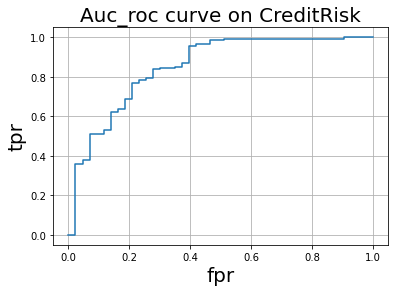

In [45]:
plt.plot(fpr, tpr)
plt.xlabel("fpr", size = 20)
plt.ylabel("tpr", size = 20)
plt.title("Auc_roc curve on CreditRisk", size = 20)
plt.grid()